<a href="https://colab.research.google.com/github/gcosma/DECODEclinicalTrialCalc/blob/main/STAGE1calcold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EQ-5D-3L Power Calculator: Parameter Guide for Clinicians

## Overview
This calculator helps determine the sample size needed for a study using the EQ-5D-3L quality of life measure in learning disability populations, accounting for GP practice clustering.

## Study Parameters

### Statistical Power (Default = 0.80)
* What it means: Your chance of detecting a true difference between groups
* Standard choice: 80% (0.80) is conventional in clinical research
* Higher values (e.g., 90%) give more confidence but require larger samples
* Lower values increase the risk of missing real effects

### Significance Level (α) (Default = 0.05)
* What it means: Risk of falsely claiming a difference exists
* Standard choice: 5% (0.05) in medical research
* Represents maximum acceptable risk of false positive result
* Almost always set to 0.05 unless there are special circumstances

### ICC - Intraclass Correlation Coefficient (Default = 0.05)
* What it means: Similarity of responses within same GP practice
* Typical range: 0.01 to 0.10 for GP practice studies
* Higher ICC = more similar within practices = need larger sample
* Based on clustering of patients within GP practices

### Average LD Patients per Practice (Default = 75)
* What it means: Expected eligible patients per practice
* Typical range: 50-100 patients with LD per UK practice
* Used to calculate number of practices needed
* Consider local practice sizes when adjusting

### Expected Dropout Rate (Default = 25%)
* What it means: Expected loss to follow-up
* Includes: Withdrawals, moves, deaths, missing data
* Higher rates need larger initial samples
* Consider your population's stability and study duration

### Expected Proxy Response Rate (Default = 40%)
* What it means: Proportion needing carer/family responses
* Affects data quality considerations
* Based on LD population capabilities
* May vary by practice and LD severity mix

## EQ-5D-3L Specific Parameters

### Baseline EQ-5D-3L Score (Default = 0.64)
* What it means: Starting quality of life score
* Range: -0.594 (worse than death) to 1.0 (perfect health)
* Default based on LD population averages
* Adjust based on your specific population

### Standard Deviation (Default = 0.26)
* What it means: Typical variation in scores
* Larger SD = more variation = larger sample needed
* Use pilot data if available
* Default from LD population studies

### Effect Sizes to Detect
* Minimal Clinically Important Difference (MCID) = 0.074
* Smaller effects need larger samples
* Options:
  * 0.074 (MCID) = conservative, needs largest sample
  * 0.10 = moderate effect
  * 0.15 = large effect
  * 0.20 = very large effect

## Understanding Results

### Sample Size Output
* Shows required participants per group
* Total study needs twice this number (intervention + control)
* Accounts for:
  * Clustering in practices
  * Expected dropouts
  * Proxy responses
  * Desired power
  * Chosen effect size

### Feasibility Warnings
* Triggers if sample exceeds 1% of UK LD population
* Warns if too many practices needed (>100)
* Helps assess practicality
* Consider resources and recruitment capability

## Tips for Use
1. Start with default values
2. Adjust based on your population
3. Try different effect sizes
4. Check feasibility of recruitment
5. Consider available resources
6. Balance ideal vs practical

## Need Help?
* Hover over parameters for tooltips
* Effect size choice is crucial - consider what's clinically meaningful
* Conservative choices = larger samples
* Balance statistical ideals with practical constraints

#Difference between this and the other calculator on hospitalisation

# Understanding Power vs Effect Size in EQ-5D-3L Calculator

## Key Parameters Explained

### Statistical Power (0.80 or 80%)
* This is fixed at 0.80 (80%) by convention
* Represents chance of detecting a true difference
* Standard in clinical research
* Higher power (e.g., 90%) would need larger sample sizes

### Effect Sizes for EQ-5D-3L
Current options in calculator:
* 0.074 (MCID - Minimal Clinically Important Difference)
* 0.10 (Moderate improvement)
* 0.15 (Large improvement)
* 0.20 (Very large improvement)

## Interpreting EQ-5D-3L Effect Sizes

### Example Calculation
Starting point: Baseline score = 0.64
With MCID effect (0.074):
* Baseline: 0.64
* Expected after intervention: 0.714 (0.64 + 0.074)
* This represents the smallest meaningful improvement

### Understanding the Scale
* EQ-5D-3L ranges from -0.594 to 1.0
* -0.594 = worst possible health state
* 0 = death
* 1.0 = perfect health

## Comparison with Emergency Admissions

### Emergency Admissions Calculator
* Used percentage reductions (e.g., 20% fewer admissions)
* Effects expressed as: 5%, 10%, 15%, 20%, 25%, 30%
* Easier to interpret as percentages

### EQ-5D-3L Calculator
* Uses absolute score changes
* Effects expressed as: 0.074, 0.10, 0.15, 0.20
* More complex to interpret but more accurate for QoL measures

## Options for Your Study

### Option 1: Keep Current Absolute Changes
Advantages:
* Aligns with published literature
* Based on validated MCID
* More precise for QoL measurement

### Option 2: Convert to Percentages
Could express as:
* ~12% improvement (0.074 effect)
* ~16% improvement (0.10 effect)
* ~23% improvement (0.15 effect)
* ~31% improvement (0.20 effect)

### Option 3: Show Both
Could display:
* Absolute change (e.g., 0.074)
* Percentage change (e.g., ~12%)
* Helps interpretation for different audiences



In [ ]:
# @title Step 1

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

class LDRecruitmentCalculator:
    def __init__(self):
        self.setup_controls()

    def setup_controls(self):
        style = {'description_width': '180px'}
        layout = widgets.Layout(width='400px')

        self.total_ld_patients_per_practice = widgets.IntText(
            value=40,
            description='Total LD Patients per Practice:',
            style=style,
            layout=layout
        )

        self.mltc_percentage = widgets.FloatText(
            value=67,
            description='MLTC Rate (%):',
            style=style,
            layout=layout
        )

        self.ahc_uptake_percentage = widgets.FloatText(
            value=70,
            description='AHC Uptake Rate (%):',
            style=style,
            layout=layout
        )

        self.study_recruitment_percentage = widgets.FloatText(
            value=40,
            description='Study Recruitment Rate (%):',
            style=style,
            layout=layout
        )

        self.calc_button = widgets.Button(
            description='Calculate',
            button_style='info',
            layout=widgets.Layout(width='200px')
        )
        self.calc_button.on_click(self.update_calculations)

    def display_controls(self):
        inputs_box = widgets.VBox([
            widgets.HTML("<h3 style='font-family: Arial; color: #2c3e50;'>LD Study Recruitment Calculator</h3>"),
            self.total_ld_patients_per_practice,
            self.mltc_percentage,
            self.ahc_uptake_percentage,
            self.study_recruitment_percentage,
            widgets.HBox([self.calc_button], layout=widgets.Layout(justify_content='center', padding='20px'))
        ], layout=widgets.Layout(padding='10px'))

        display(inputs_box)

    def calculate_numbers(self):
        mltc_decimal = self.mltc_percentage.value / 100
        ahc_decimal = self.ahc_uptake_percentage.value / 100
        recruitment_decimal = self.study_recruitment_percentage.value / 100

        # Calculations with rounding at each step
        mltc_patients = round(self.total_ld_patients_per_practice.value * mltc_decimal, 2)  # 26.67
        ahc_patients = round(mltc_patients * ahc_decimal, 2)  # 18.67
        expected_participants = round(ahc_patients * recruitment_decimal, 2)  # 7.47
        final_participants = int(expected_participants)  # Round down to 7

        return {
            'mltc_patients': mltc_patients,
            'ahc_patients': ahc_patients,
            'calculated_participants': expected_participants,
            'final_participants': final_participants
        }

    def plot_recruitment_analysis(self, results):
        required_total_sample_size = 204
        number_of_practices = np.arange(24, 49, 2)

        total_participants = number_of_practices * results['final_participants']
        percentage_above_target = ((total_participants - required_total_sample_size) / required_total_sample_size) * 100

        plt.figure(figsize=(12, 6))

        colors = plt.cm.RdYlGn(np.linspace(0, 1, len(number_of_practices)))
        bars = plt.bar(number_of_practices/2, percentage_above_target, color=colors)

        plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Target (204)')

        target_idx = np.where(number_of_practices == 36)[0][0]
        plt.plot(36/2, percentage_above_target[target_idx], 'r*', markersize=15,
                label=f'Target: 36 practices\n({total_participants[target_idx]} participants, {percentage_above_target[target_idx]:.1f}% above target)')

        plt.xlabel('Practices per Arm', fontsize=12)
        plt.ylabel('Percentage Above Target (%)', fontsize=12)
        plt.title('Expected Recruitment by Practice Numbers\nTarget Sample Size: 204',
                 fontsize=14, pad=20)

        for i, v in enumerate(percentage_above_target):
            plt.text(number_of_practices[i]/2, v + (1 if v >= 0 else -3),
                    f'{number_of_practices[i]} practices\n{total_participants[i]} participants\n{v:.1f}%',
                    ha='center', fontsize=8)

        print("\n🔢 Step-by-Step Calculations:")
        print(f"• Starting with {self.total_ld_patients_per_practice.value} LD patients per practice")
        print(f"• MLTC patients ({self.mltc_percentage.value}%): {results['mltc_patients']}")
        print(f"• After AHC uptake ({self.ahc_uptake_percentage.value}%): {results['ahc_patients']}")
        print(f"• Calculated recruitment ({self.study_recruitment_percentage.value}%): {results['calculated_participants']}")
        print(f"• Final participants per practice (rounded): {results['final_participants']}")

        print("\n📊 Recruitment Analysis:")
        print(f"• With 36 practices (18 per arm):")
        print(f"  - Expected total participants: {36 * results['final_participants']}")
        print(f"  - Target sample size: {required_total_sample_size}")
        print(f"  - Additional participants above target: {(36 * results['final_participants']) - required_total_sample_size}")
        print(f"  - Percentage above target: {percentage_above_target[target_idx]:.1f}%")

        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def update_calculations(self, _):
        clear_output(wait=True)
        self.display_controls()
        results = self.calculate_numbers()
        self.plot_recruitment_analysis(results)

calculator = LDRecruitmentCalculator()
calculator.display_controls()

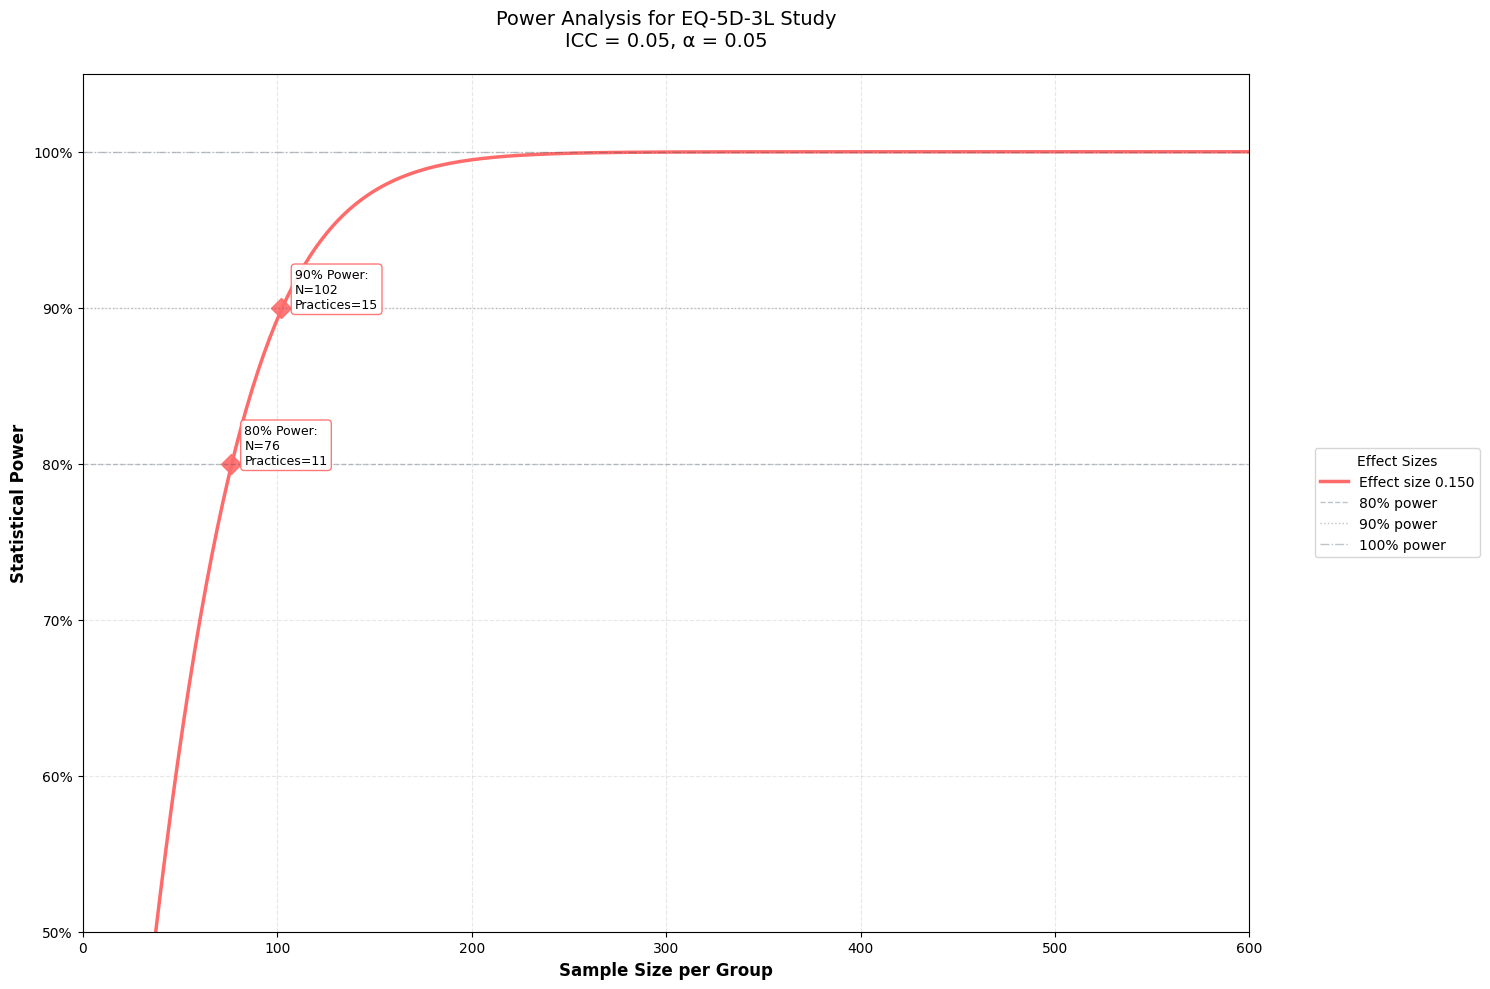


📊 Sample Size Requirements at Different Power Levels:

Effect size 0.150:
• 80% Power: N=76 (Practices=11)
• 90% Power: N=102 (Practices=15)

📊 EQ-5D-3L Sample Size Analysis

📝 Study Parameters:
• Power: 90.00%
• Significance level (α): 0.050
• ICC: 0.050
• Average cluster size: 7 patients/practice
• Expected dropout rate: 20%
• Expected proxy responses: 40%

📈 EQ-5D-3L Parameters:
• Baseline score: 0.64
• Standard deviation: 0.26

🎯 Required Sample Sizes:

Effect size 0.150:
• Required per group: 102 participants
• Total study size: 204 participants
• Practices needed: 15 per group
• Total practices: 30
• Achieved power: 89.8%


In [ ]:
# @title Step 2: Power calculation. Add the final result to the Average Patients per Practice box
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import clear_output, display

class EQ5DAnalyzer:
    def __init__(self):
        self.setup_controls()

    def setup_controls(self):
        style = {'description_width': '300px'}
        layout = widgets.Layout(width='400px')

        # Study Parameters
        self.power = widgets.FloatText(
            value=0.80,
            description='Statistical Power:',
            style=style,
            layout=layout
        )

        self.alpha = widgets.FloatText(
            value=0.05,
            description='Significance Level (α):',
            style=style,
            layout=layout
        )

        self.icc = widgets.FloatText(
            value=0.05,
            description='ICC:',
            style=style,
            layout=layout
        )

        self.intervention_cluster_size = widgets.IntText(
            value=7,
            description='Average Patients per Practice (from the step 1):',
            style=style,
            layout=layout
        )

        self.intervention_dropout = widgets.FloatText(
            value=0.20,
            description='Expected Dropout Rate:',
            style=style,
            layout=layout
        )

        self.intervention_proxy = widgets.FloatText(
            value=0.40,
            description='Expected Proxy Response Rate:',
            style=style,
            layout=layout
        )

        self.intervention_baseline = widgets.FloatText(
            value=0.64,
            description='Baseline EQ-5D-3L Score:',
            style=style,
            layout=layout
        )

        self.intervention_sd = widgets.FloatText(
            value=0.26,
            description='EQ-5D-3L Standard Deviation:',
            style=style,
            layout=layout
        )

        # Effect Sizes with adjusted layout
        self.effect_sizes = widgets.SelectMultiple(
            options=[0.074, 0.10, 0.15, 0.20],
            value=[0.15],
            description='Effect Sizes to Analyze:',
            style=style,
            layout=widgets.Layout(
                width='400px',
                height='120px',  # Increased height to accommodate all options
                margin='10px 0px'  # Added margin for spacing
            )
        )

        self.calc_button = widgets.Button(
            description='Calculate Sample Size',
            button_style='info',
            layout=widgets.Layout(width='200px')
        )
        self.calc_button.on_click(self.update_analysis)

    def display_controls(self):
        study_params = widgets.VBox([
            widgets.HTML("<h3 style='font-family: Arial; color: #2c3e50;'>Study Parameters</h3>"),
            self.power,
            self.alpha,
            self.icc,
            self.intervention_cluster_size,
            self.intervention_dropout,
            self.intervention_proxy
        ], layout=widgets.Layout(padding='10px'))

        eq5d_params = widgets.VBox([
            widgets.HTML("<h3 style='font-family: Arial; color: #2c3e50;'>EQ-5D Parameters</h3>"),
            self.intervention_baseline,
            self.intervention_sd,
            self.effect_sizes
        ], layout=widgets.Layout(padding='10px'))

        display(widgets.VBox([
            study_params,
            eq5d_params,
            widgets.HBox([self.calc_button],
                        layout=widgets.Layout(justify_content='center', padding='20px'))
        ]))

    def calculate_base_n(self, effect_size, power):
        """Calculate base sample size without adjustments"""
        z_alpha = stats.norm.ppf(1 - self.alpha.value/2)
        z_beta = stats.norm.ppf(power)

        n = 2 * ((z_alpha + z_beta)**2 * (2 * self.intervention_sd.value**2)) / (effect_size**2)
        return n

    def calculate_adjusted_n(self, base_n):
        """Apply clustering and dropout adjustments"""
        design_effect = 1 + ((self.intervention_cluster_size.value - 1) * self.icc.value)
        n_adjusted = base_n * design_effect / (1 - self.intervention_dropout.value)
        return n_adjusted

    def calculate_power(self, n, effect_size):
        """Calculate achieved power for a given sample size"""
        # Adjust effective sample size for clustering and dropout
        n_effective = n * (1 - self.intervention_dropout.value)
        design_effect = 1 + ((self.intervention_cluster_size.value - 1) * self.icc.value)
        n_effective = n_effective / design_effect

        # Calculate non-centrality parameter
        se = np.sqrt((2 * self.intervention_sd.value**2) / n_effective)
        ncp = effect_size / se

        # Calculate power
        z_alpha = stats.norm.ppf(1 - self.alpha.value/2)
        z_beta = ncp - z_alpha
        power = stats.norm.cdf(z_beta)

        return power

    def find_n_for_power(self, target_power, effect_size):
        """Binary search for required sample size"""
        base_n = self.calculate_base_n(effect_size, target_power)
        n_adjusted = self.calculate_adjusted_n(base_n)

        # Fine-tune with binary search
        n_min, n_max = int(n_adjusted * 0.5), int(n_adjusted * 1.5)
        tolerance = 0.001

        while n_max - n_min > 1:
            n = (n_min + n_max) // 2
            power = self.calculate_power(n, effect_size)

            if abs(power - target_power) < tolerance:
                return n
            elif power < target_power:
                n_min = n
            else:
                n_max = n

        return n_min

    def plot_analysis(self):
        plt.figure(figsize=(15, 10), dpi=100, facecolor='white')

        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
        target_powers = [0.80, 0.90, 1.00]

        # Calculate reasonable max sample size
        max_n = max(self.find_n_for_power(0.90, min(self.effect_sizes.value)) * 1.2, 600)
        sample_sizes = np.linspace(10, max_n, 200)

        for i, effect_size in enumerate(self.effect_sizes.value):
            # Calculate power curves
            powers = [self.calculate_power(n, effect_size) for n in sample_sizes]

            plt.plot(sample_sizes, powers,
                    label=f'Effect size {effect_size:.3f}',
                    color=colors[i % len(colors)],
                    linewidth=2.5)

            # Add markers for target power levels
            for target_power in target_powers:
                if target_power < 1.0:  # Skip 100% power point as it's theoretical
                    n_target = self.find_n_for_power(target_power, effect_size)
                    practices_needed = np.ceil(n_target / self.intervention_cluster_size.value)

                    plt.plot(n_target, target_power, 'D',
                            color=colors[i % len(colors)],
                            markersize=10,
                            alpha=0.9)

                    plt.annotate(
                        f'{target_power:.0%} Power:\n'
                        f'N={n_target:,.0f}\n'
                        f'Practices={practices_needed:.0f}',
                        xy=(n_target, target_power),
                        xytext=(10, 0),
                        textcoords='offset points',
                        bbox=dict(
                            boxstyle="round,pad=0.3",
                            fc="white",
                            ec=colors[i % len(colors)],
                            alpha=0.9
                        ),
                        fontsize=9
                    )

        # Add reference lines
        line_styles = ['--', ':', '-.']
        for power, style in zip(target_powers, line_styles):
            plt.axhline(y=power,
                       color='#2c3e50',
                       linestyle=style,
                       alpha=0.3,
                       linewidth=1,
                       label=f'{power:.0%} power')

        plt.xlabel('Sample Size per Group', fontsize=12, weight='bold')
        plt.ylabel('Statistical Power', fontsize=12, weight='bold')
        plt.title('Power Analysis for EQ-5D-3L Study\n' +
                 f'ICC = {self.icc.value:.2f}, α = {self.alpha.value}',
                 fontsize=14,
                 pad=20)

        plt.legend(title='Effect Sizes',
                  fontsize=10,
                  bbox_to_anchor=(1.05, 0.5),
                  loc='center left')

        plt.grid(True, linestyle='--', alpha=0.3)
        plt.ylim(0.5, 1.05)
        plt.xlim(0, max_n)

        plt.yticks(np.arange(0.5, 1.05, 0.1),
                  [f'{x:.0%}' for x in np.arange(0.5, 1.05, 0.1)])

        plt.tight_layout()
        plt.show()

    def display_summary(self):
        print("\n📊 Sample Size Requirements at Different Power Levels:")
        print("===================================================")

        for effect_size in self.effect_sizes.value:
            print(f"\nEffect size {effect_size:.3f}:")
            for power in [0.80, 0.90]:
                n_required = self.find_n_for_power(power, effect_size)
                practices = np.ceil(n_required / self.intervention_cluster_size.value)
                achieved_power = self.calculate_power(n_required, effect_size)
                print(f"• {power:.0%} Power: N={n_required:,.0f} (Practices={practices:.0f})")

        print("\n📊 EQ-5D-3L Sample Size Analysis")
        print("================================")

        print("\n📝 Study Parameters:")
        print(f"• Power: {self.power.value:.2%}")
        print(f"• Significance level (α): {self.alpha.value:.3f}")
        print(f"• ICC: {self.icc.value:.3f}")
        print(f"• Average cluster size: {self.intervention_cluster_size.value} patients/practice")
        print(f"• Expected dropout rate: {self.intervention_dropout.value:.0%}")
        print(f"• Expected proxy responses: {self.intervention_proxy.value:.0%}")

        print("\n📈 EQ-5D-3L Parameters:")
        print(f"• Baseline score: {self.intervention_baseline.value:.2f}")
        print(f"• Standard deviation: {self.intervention_sd.value:.2f}")

        print("\n🎯 Required Sample Sizes:")
        for effect_size in self.effect_sizes.value:
            n = self.find_n_for_power(self.power.value, effect_size)
            practices = np.ceil(n / self.intervention_cluster_size.value)
            achieved_power = self.calculate_power(n, effect_size)

            print(f"\nEffect size {effect_size:.3f}:")
            print(f"• Required per group: {n:,.0f} participants")
            print(f"• Total study size: {n*2:,.0f} participants")
            print(f"• Practices needed: {practices:.0f} per group")
            print(f"• Total practices: {practices*2:.0f}")
            print(f"• Achieved power: {achieved_power:.1%}")

            if n*2 > 2000:
                print("⚠️  Warning: Large sample size may be challenging to recruit")
            if practices*2 > 40:
                print("⚠️  Warning: Large number of practices required")

    def update_analysis(self, _):
        clear_output(wait=True)
        self.display_controls()
        self.plot_analysis()
        self.display_summary()

# Create and display analyzer
analyzer = EQ5DAnalyzer()
analyzer.display_controls()